**📡RAY LAUNCHER W MOIM POKOJU**

#Założenia projektowe


Przyjmij rozmiar pokoju według proporcji tzw. złotego podziału, tzn. boki pokoju mają długość 𝑎, 𝑏, gdzie (a+b)/a = a/b. Na środku krótszej ściany (o długości 𝑎) zamontowałeś punkt dostępowy transmitujący dla częstotliwości 5 GHz. Przyjmij charakterystykę anteny nadawczej i odbiorczej jako dookólną o zysku 1 (w skali liniowej). Minimalna wartość boku a to 12 m.

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
a = 17 # krótsza ściana 
b = 27.506578 # dłuższa ściana

k = 1 # odległość anten od krótszej ściany [m]
hA = a/2 #wysokość antyny nadawczej i odbioczej od sciany b 

# #zakres odleglosci anten <dmin, dmax>
dmin = k 
dmax = b-k

c = 299792458 #m/s
f = 5 *10**9 # czestotliowas fali radiowej [GHz]

ni_wall =  5.24 #współczynnik dla drewnianej ściany

lp = 1000 #częstotliwość pomiarów (co mm)

#A.1 Dla odbiornika poruszającego się w osi pokoju

A.1 Wyznacz wykres tłumienia ścieżki dla odbiornika poruszającego się w osi pokoju (osi równoległej do
dłuższej ściany, przecinającej punkt położenia anteny)

In [ ]:
lamb = c/f
print("Długość fali:")
print(lamb,"[m] =",np.round(lamb*100,3),"[cm]")

zakres = dmax - dmin
d = np.arange(dmin, dmax, zakres/(lp-1),dtype=float)

PrPt_ = 1*1*((lamb/(4*np.pi*d))**2)
PrPt = np.abs(PrPt_)
PrPt = 10*np.log10(PrPt)

Długość fali:
0.0599584916 [m] = 5.996 [cm]


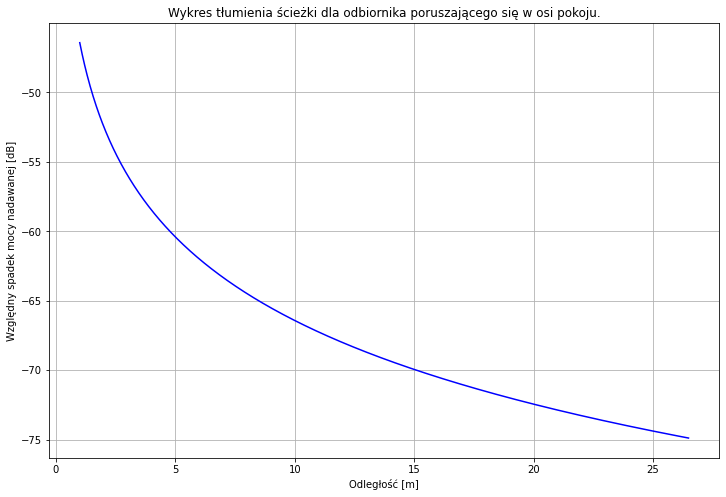

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Wykres tłumienia ścieżki dla odbiornika poruszającego się w osi pokoju.")
plt.xlabel("Odległość [m]")
plt.ylabel("Względny spadek mocy nadawanej [dB]")
plt.plot(d,PrPt, color="blue")
plt.grid()

#A.2 Gdy istnieją także ścieżki odbite

A.2
Wyznacz wykres tłumienia ścieżki, gdy istnieją także ścieżki odbite:
* 1D – od przeciwległej ściany

Współczynniki odbicia przyjmij według normy P.2040, Przenikalność elektryczną materiałów
budowlanych przyjmij także według normy (rodzaj materiałów dobierz samodzielnie)


In [ ]:
a_wall = (ni_wall - np.sqrt(ni_wall))/(ni_wall + np.sqrt(ni_wall))  #obliczenie współczynika odbicia od ściany
print("Współczynnik a_wall:")
print(a_wall)

dmin = 0
dmax = b-k

zakres = dmax - dmin
d0 = np.arange(dmin, dmax+k, zakres/(lp-1),dtype=float) #nowe d ze względu na odbicie od ściany

fi1 = np.pi*(2)*d0/c #faza bez odbicia
fi2 = np.pi*(2)*(2*b-d0)/c #faza z odbiciem

e1 = np.exp(-1j*fi1)
e2 = np.exp(-1j*fi2)

PrPt1 = np.abs((1/d0*e1 + a_wall/(2*b-d0)*e2))
PrPt1 = 20*np.log10(PrPt1)

Współczynnik a_wall:
0.39193177903211346


<ipython-input-48-47347de840ca>:17: RuntimeWarning: divide by zero encountered in true_divide
  PrPt1 = np.abs((1/d0*e1 + a_wall/(2*b-d0)*e2))
<ipython-input-48-47347de840ca>:17: RuntimeWarning: invalid value encountered in multiply
  PrPt1 = np.abs((1/d0*e1 + a_wall/(2*b-d0)*e2))


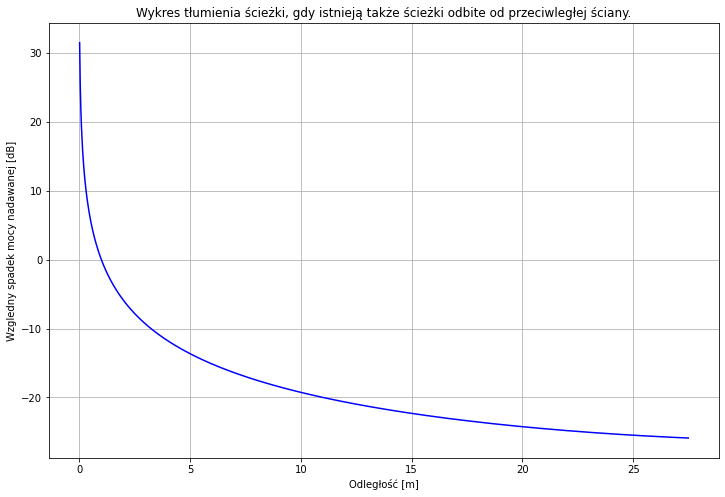

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Wykres tłumienia ścieżki, gdy istnieją także ścieżki odbite od przeciwległej ściany.")
plt.xlabel("Odległość [m]")
plt.ylabel("Wzgledny spadek mocy nadawanej [dB]")
plt.plot(d0,PrPt1, color="blue")
plt.grid()

# A.3 Rozbudowujemy pokój o część o bokach 𝑏, 𝑎. Odbiornik porusza się w osi tej części

A.3 Wyznacz stratę dyfrakcji według metody Deygout. Przyjmij występowanie dyfrakcji wyłącznie, gdy
odbiornik nie ma bezpośredniej widoczności z nadajnikiem.
* 1D – wyznacz wartość straty dyfrakcji w osi dobudowanej części 


In [ ]:
dmin = b
dmax = a+b
d= np.arange(dmin, dmax, zakres/(lp-1),dtype=float)

S =  np.sqrt((b-1/2*a)**2+(d-1/2*a)**2) # wektor przechodzący przez ścianę 

r1 = np.sqrt((b-a)**2 + (1/2*a)**2) # przeciwprostokątna trójkąta r1
r2 = np.sqrt((1/2*a)**2 + (a-d)**2)  # przeciwprostokątna trójkąta r2

alpha = np.arccos((r2**2 - r1**2 - S**2)/(-2*r1*S))

# Wyznaczanie straty dyfrakcji w osi dobudowanej pokoju (na rogu ściany)
h = r1*np.sin(alpha)
v = h*np.sqrt(2/lamb * S/(r1*r2))

C = 6.9 + 20*np.log10(np.sqrt((v-0.1)**2 + 1) + v-0.1)

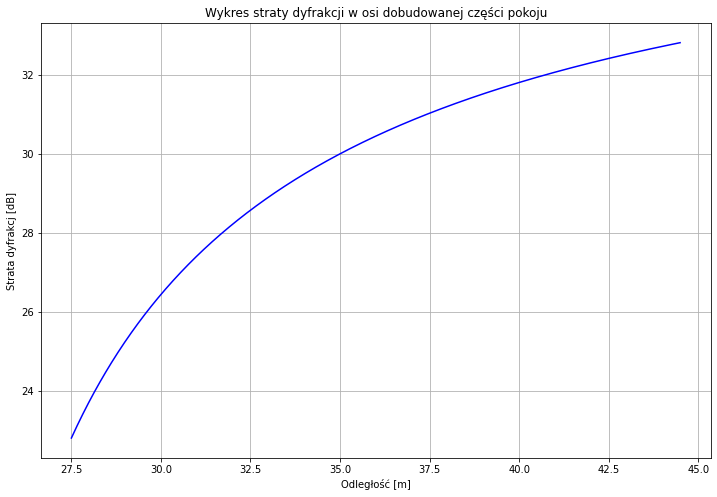

In [ ]:
# plot
plt.figure(figsize=(12,8))
plt.title("Wykres straty dyfrakcji w osi dobudowanej części pokoju")
plt.xlabel("Odległość [m]")
plt.ylabel("Strata dyfrakcj [dB]")
plt.plot(d, C, color="blue")
plt.grid()

# A.4 Pokój stał się symetryczną podkową. Wyznaczamy wartość tłumienia ścieżki dla trzech wariantów radiowych


Kolejna rozbudowa, tak, aby pokój stał się symetryczną podkową.
Wyznacz wartość tłumienia ścieżki dla trzech wariantów radiowych *(osobne sekcje w pliku)*

#A.4.1 Sygnał przenika przez dwie ściany i dociera do odbiornika 

In [ ]:
d_min = 0
d_max = b-a
zakres = d_max - d_min
d=np.arange(d_min, d_max, zakres/(lp-1),dtype=float)

PL = np.ones(len(d))
odl = np.ones(len(d))
odl = d_min + d*d_max
PL = 36.8 * np.log10(odl) + 43.8 + 20 * np.log10(f)

<ipython-input-52-b65bf9a74a21>:9: RuntimeWarning: divide by zero encountered in log10
  PL = 36.8 * np.log10(odl) + 43.8 + 20 * np.log10(f)


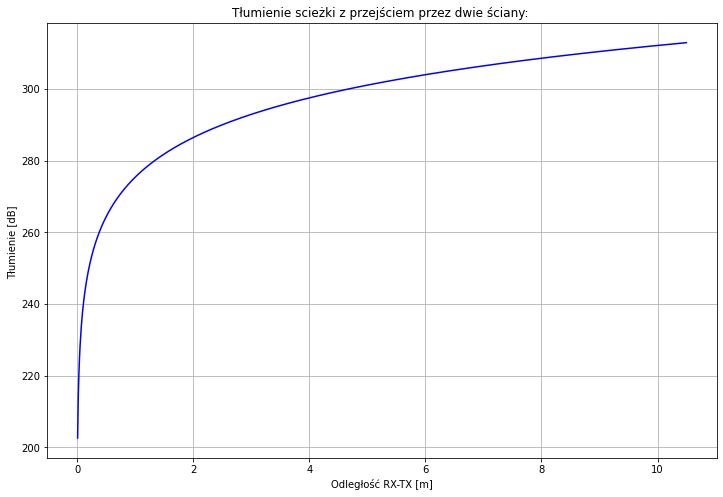

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Tłumienie scieżki z przejściem przez dwie ściany: ')
plt.xlabel('Odległość RX-TX [m]')
plt.ylabel('Tłumienie [dB] ')
plt.plot(d, PL, color = "blue")
plt.grid()
plt.show()

#A.4.2 Sygnał ulega podwójnej dyfrakcji, modelowanej tym razem według metody Berga

In [ ]:
s0 = ((b/2)**2+(a-b)**2)**(1/2)
s1 = a
s2 = np.linspace(b/2, s0, 400)
s = s0+s1+s2
k0 = 1
d0 = 0
k1 = 1
d1 = s0
v = 3.5
qlambda = 0.031
alfa = 90-math.atan((b/2)/(a-b))*(180/math.pi)
q90 = (qlambda/lamb)**(1/2)
q1 = q90*(alfa/90)**v
k2 = k1+d1*q1
d2 = k2*s1+d1
beta = np.linspace(0, alfa, 400)
q2 = [0]*400
k3 = [0]*400
d3 = [0]*400

for i in range (400):
    q2[i] = q90*(beta[i]/90)**v
    k3[i] = k2+d2*q2[i]

for i in range (400):
    d3[i] = k3[i]*s2[i]+d2

A = [0]*400
for i in range (400):
    A[i] = 20*math.log10(4*math.pi*d3[i]/lamb)

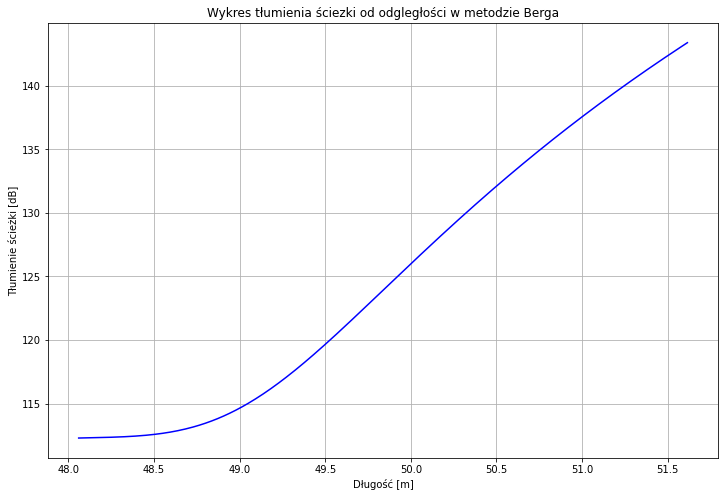

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Wykres tłumienia ściezki od odgległości w metodzie Berga")
plt.xlabel("Długość [m]")
plt.ylabel("Tłumienie ścieżki [dB]")
plt.plot(s, A, color = "blue")
plt.grid()

#A.4.3 Sygnał ulega kilkukrotnym odbiciom wynikającym z zasad geometrii

In [ ]:
d_min = 0
d_max = b-a
zakres = d_max - d_min

d=np.arange(d_min, d_max, zakres/(lp-1),dtype=float)

h1 = b*np.ones(len(d))
h2 = a*np.ones(len(d))
h3 = a*np.ones(len(d))
h4 = (b-d)*np.ones(len(d))

d1 = np.sqrt((1/2*a)**2 + h1**2)
d2 = np.sqrt((1/2*b)**2 + h2**2)
d3 = np.sqrt((1/2*b)**2 + h2**2)
d4 = np.sqrt((1/2*a)**2 + h4**2)

a_wall = (ni_wall*np.cos(0) - np.sqrt(ni_wall - (np.sin(0)**2)))/(ni_wall*np.cos(0) + np.sqrt(ni_wall- (np.sin(0)**2))) # współczynnik odbicia od ściany

fi1 = np.pi*(-2)*f*d1/c #faza bez odbicia 
fi2 = np.pi*(-2)*f*d2/c # faza z odbiciem od przeciwległej ściany
fi3 = np.pi*(-2)*f*d3/c # faza odbicia od ściany bocznej 

e1=np.exp(1j*fi1)
e2=np.exp(1j*fi2)
e3=np.exp(1j*fi3)

PrPt4 = np.abs(a_wall/d1*e1 + a_wall/d2*e2 + a_wall/d3*e2 + a_wall/d4*e3)
PrPt4 = 20*np.log10(PrPt4)

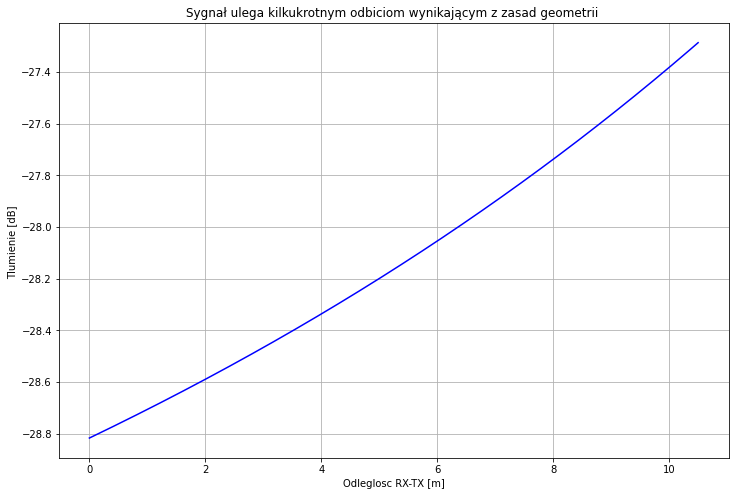

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Sygnał ulega kilkukrotnym odbiciom wynikającym z zasad geometrii ')
plt.xlabel('Odleglosc RX-TX [m]')
plt.ylabel('Tlumienie [dB] ')
plt.plot(d, PrPt4, color = "blue")
plt.grid()

# A.6 Układ budynków według siatki Manhattan

Przyjmij układ budynków według siatki Manhattan. Dla wylosowanego rozkładem jednostajnym
położenia nadajnika, wyznacz wartość tłumienia ścieżki (w wariancie 2D, dla stałej wysokości
położenia odbiornika - według wybranego modelu propagacyjnego O2O:
*   mmMagic

Wylosowane współrzędne nadajnika: ( 45 , 195 )


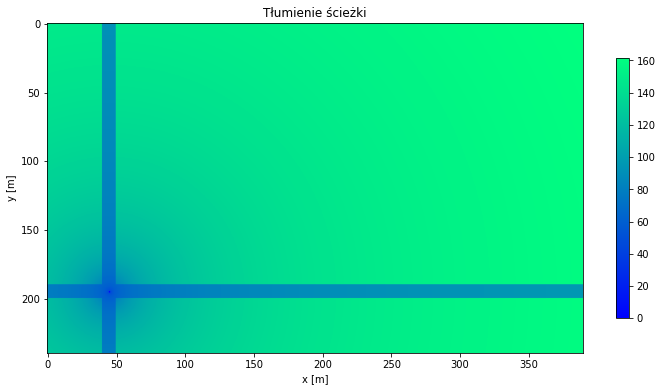

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random

# losowanie współrzędnych
wsp[0] = random.choice([45, 95, 145, 195, 245, 295, 345])
wsp[1] = random.choice([45, 95, 145, 195])
print("Wylosowane współrzędne nadajnika: (", wsp[0], ",", wsp[1],")")

widocznosc_x = np.arange(wsp[0]-5, wsp[0]+5, 1)
widocznosc_y = np.arange(wsp[1]-5, wsp[1]+5, 1)

zakres_x = np.arange(0,390,1)
zakres_y = np.arange(0,240,1)

# pusty wektor wartości tłumienia
wartosci_tlumienia = []

for y in zakres_y:
    for x in zakres_x:
        distance = math.sqrt((x - wsp[0])**2 + (y - wsp[1])**2)
        
        if(distance == 0):
            wartosci_tlumienia.append(0)
        else:
            if (x in widocznosc_x or y in widocznosc_y):
                PL = 19.2 * math.log10(distance) + 32.9 + 20.8 * math.log10(5)
                wartosci_tlumienia.append(PL)
            else:
                PL = 45 * math.log10(distance) + 31 + 20 * math.log10(5)
                wartosci_tlumienia.append(PL)

tlumienie_map = np.array(wartosci_tlumienia).reshape((len(zakres_y), len(zakres_x)))

# wykres tłumienia
fig, ax = plt.subplots(figsize=(12,8))
plot = ax.imshow(tlumienie_map, cmap='winter')
fig.colorbar(plot, shrink = 0.6, aspect = 20)
plt.title('Tłumienie ścieżki')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()